# 홈플러스 데이터 

오프라인 데이터를 구하기 힘들기 때문에
온라인에서 수집해서 밀키트 상품 기획을 위한 분석 수행

링크 : https://mfront.homeplus.co.kr/search?addSubCategoryYn=Y&categoryDepth=2&categoryId=200071&entry=direct&inputKeyword=%EA%B0%84%ED%8E%B8%EC%8B%9D&keyword=%EA%B0%84%ED%8E%B8%EC%8B%9D&searchType=NONE&sort=SALES_UP

## 데이터 수집

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time

In [2]:
driver = webdriver.Chrome()

url = "https://mfront.homeplus.co.kr/search?addSubCategoryYn=Y&categoryDepth=2&categoryId=200071&entry=direct&inputKeyword=%EA%B0%84%ED%8E%B8%EC%8B%9D&keyword=%EA%B0%84%ED%8E%B8%EC%8B%9D&searchType=NONE&sort=SALES_UP"
driver.get(url)

### 스크래핑할 부분 샘플 체크

In [3]:
 product_name = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(1) > div.detailInfoWrap > div.detailInfo > a > p").text

In [4]:
print( product_name)   

애슐리 오리지널 통살치킨 500G


In [6]:
price_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(1) > div.detailInfoWrap > div.detailInfo > div.priceWrap > div > strong").text
price = int(price_text.replace(",", ""))  # 쉼표 제거 후 정수로 변환
print(f"가격: {price}")

가격: 8990


In [7]:
price_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(2) > div.detailInfoWrap > div.detailInfo > div.priceWrap > div > strong").text
price = int(price_text.replace(",", ""))
print(f"가격: {price}")
print(price_text)

가격: 10900
10,900


In [9]:
rating_text = driver.find_element(By.CSS_SELECTOR,
                                  "#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(1) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.score").text
rating = float(rating_text)  # 문자열을 실수로 변환
print(f"별점: {rating}")

별점: 4.7


In [10]:
rating_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(1) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.score").text
rating = float(rating_text)
print(f"별점: {rating}")

별점: 4.7


In [ ]:
# 한 줄에 두개상품씩 있을 때
review_text = driver.find_element(By.CSS_SELECTOR, "#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(1) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.reviewCnt").text
review_count = int(review_text.replace("/", "").replace(",", ""))  # '/'와 ',' 제거 후 정수로 변환
print(f"리뷰 수: {review_count}")

In [12]:
# 한 줄에 세개 상품 씩 있을 때
review_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(1) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.reviewCnt").text
review_count = int(review_text.replace("/", "").replace(",", ""))
print(f"리뷰 수: {review_count}")

리뷰 수: 6922


In [15]:
# 한 줄에 세개 상품 씩 있을 때
sale_count_text = driver.find_element(By.CSS_SELECTOR, "#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(1) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.saleCount").text
sale_count = int(sale_count_text.replace(",", ""))  # 쉼표 제거 후 정수로 변환
print(f"판매 수량: {sale_count}")

판매 수량: 65428


In [ ]:
# 한 줄에 두개상품씩 있을 때
g_100_price = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(1) > div.detailInfoWrap > div.detailInfo > div.priceQty > span").text
g100price_count = int(g_100_price.replace(",", ""))
print(f"100g당가격: {g100price_count}")   

In [18]:
# 한 줄에 세개 상품 씩 있을 때
g_100_price = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(1) > div.detailInfoWrap > div.detailInfo > div.priceQty > span").text
g100price_count = int(g_100_price.replace(",", ""))
print(f"100g당가격: {g100price_count}")   

100g당가격: 1798


### 반복문으로 끌고오기

**주의1)** 새창에서 스크롤을 먼저 제일 아래로 수행해줘야 수집이 가능하다. (무한스크롤이라 다음 상품이 로딩되는데 시간이 있다. 따라서 먼저 스크롤 다 한후 진행)

**주의2)** 첫번째 상품 카테고리 4개와 그 밑은 selector 구조가 다르다. 따라서 두개로 그룹을 나누어 반복문 실행

In [20]:
# 상품 개수 확인 (첫 번째 상품 컨테이너의 개수)
items = driver.find_elements(By.CSS_SELECTOR, "div.infinite-scroll-component > div > div:nth-child(1) > div")
total_items = len(items)
print(total_items)

4


In [39]:
product_list = []

# 첫 번째 그룹 (div:nth-child(1))
for i in range(1, 5):
    try:
        product_name = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > a > p").text
        
        price_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.priceWrap > div > strong").text
        price = int(price_text.replace(",", ""))
        
        try:
            rating_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.score").text
            rating = float(rating_text)
        except:
            rating = None
            
        try:
            review_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.reviewCnt").text
            review_count = int(review_text.replace("/", "").replace(",", ""))
        except:
            review_count = 0
         ##여기부터 다시 고치기 2025.01.07   
        try:
            sale_count_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.saleCount").text
            sale_count = int(sale_count_text.replace(",", ""))  # 쉼표 제거 후 정수로 변환
        except:
            sale_count = 0
        
        try:
            g_100_price = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.priceQty > span").text
            g100price_count = int(g_100_price.replace(",", ""))
        except:
            g100price_count = 0

        
        
        product_data = {
            '상품명': product_name,
            '가격': price,
            '별점': rating,
            '리뷰수': review_count,
            '판매수량': sale_count,
            '100g당가격' : g100price_count
        }

        product_list.append(product_data)
        print(f"첫 번째 그룹 {i}번째 상품 수집 완료")
        
    except Exception as e:
        print(f"첫 번째 그룹 {i}번째 상품 수집 실패: {e}")
        continue

# 두 번째 그룹 (div:nth-child(2))
for i in range(1, 1113):  # 1121까지
    try:
        product_name = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > a > p"))).text
        price_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.priceWrap > div > strong").text
        price = int(price_text.replace(",", ""))
        
        try:
            rating_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.score").text
            rating = float(rating_text)
        except:
            rating = None
            
        try:
            review_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.reviewCnt").text
            review_count = int(review_text.replace("/", "").replace(",", ""))
        except:
            review_count = 0
            
        try:
            sale_count_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.saleCount").text
            sale_count = int(sale_count_text.replace(",", ""))
        except:
            sale_count = 0
        
        try:
            g_100_price = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.priceQty > span").text
            g100price_count = int(g_100_price.replace(",", ""))
        except:
            g100price_count = 0

        product_data = {
            '상품명': product_name,
            '가격': price,
            '별점': rating,
            '리뷰수': review_count,
            '판매수량': sale_count,
            '100g당가격': g100price_count
        }
        product_list.append(product_data)
        if i % 50 == 0:  # 50개 단위로 진행상황 출력
            print(f"두 번째 그룹 {i}번째 상품 수집 완료")
        
    except Exception as e:
        print(f"두 번째 그룹 {i}번째 상품 수집 실패: {e}")
        continue

# DataFrame 생성
df = pd.DataFrame(product_list)

첫 번째 그룹 1번째 상품 수집 완료
첫 번째 그룹 2번째 상품 수집 완료
첫 번째 그룹 3번째 상품 수집 완료
첫 번째 그룹 4번째 상품 수집 완료
두 번째 그룹 50번째 상품 수집 완료
두 번째 그룹 100번째 상품 수집 완료
두 번째 그룹 150번째 상품 수집 완료
두 번째 그룹 200번째 상품 수집 완료
두 번째 그룹 250번째 상품 수집 완료
두 번째 그룹 300번째 상품 수집 완료
두 번째 그룹 350번째 상품 수집 완료
두 번째 그룹 400번째 상품 수집 완료
두 번째 그룹 450번째 상품 수집 완료
두 번째 그룹 500번째 상품 수집 완료
두 번째 그룹 550번째 상품 수집 완료
두 번째 그룹 600번째 상품 수집 완료
두 번째 그룹 650번째 상품 수집 완료
두 번째 그룹 700번째 상품 수집 완료
두 번째 그룹 750번째 상품 수집 완료
두 번째 그룹 800번째 상품 수집 완료
두 번째 그룹 850번째 상품 수집 완료
두 번째 그룹 900번째 상품 수집 완료
두 번째 그룹 950번째 상품 수집 완료
두 번째 그룹 1000번째 상품 수집 완료
두 번째 그룹 1050번째 상품 수집 완료
두 번째 그룹 1100번째 상품 수집 완료


In [46]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

# WebDriverWait 객체 생성 (최대 60초 대기)
wait = WebDriverWait(driver, 3)

product_list = []

# 첫 번째 그룹 (변경 없음)
for i in range(1, 5):
    try:
        # 상품명
        product_name = wait.until(
            EC.presence_of_element_located((By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > a > p"))
        ).text
        
        # 가격
        price_text = wait.until(
            EC.presence_of_element_located((By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.priceWrap > div > strong"))
        ).text
        price = int(price_text.replace(",", ""))

        # 별점
        try:
            rating_text = wait.until(
                EC.presence_of_element_located((By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.score"))
            ).text
            rating = float(rating_text)
        except:
            rating = None
            
        # 리뷰수
        try:
            review_text = wait.until(
                EC.presence_of_element_located((By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.reviewCnt"))
            ).text
            review_count = int(review_text.replace("/", "").replace(",", ""))
        except:
            review_count = 0
            
        # 판매수량
        try:
            sale_count_text = wait.until(
                EC.presence_of_element_located((By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.saleCount"))
            ).text
            sale_count = int(sale_count_text.replace(",", ""))
        except:
            sale_count = 0

        # 100g당 가격
        try:
            g_100_price = wait.until(
                EC.presence_of_element_located((By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.priceQty > span"))
            ).text
            g100price_count = int(g_100_price.replace(",", ""))
        except:
            g100price_count = 0
        
        # 수집된 데이터 저장
        product_data = {
            '상품명': product_name,
            '가격': price,
            '별점': rating,
            '리뷰수': review_count,
            '판매수량': sale_count,
            '100g당가격': g100price_count
        }
        product_list.append(product_data)
        print(f"첫 번째 그룹 {i}번째 상품 수집 완료")
        
    except Exception as e:
        print(f"첫 번째 그룹 {i}번째 상품 수집 실패: {e}")
        continue

# 두 번째 그룹 (스크롤 처리 추가)
def scroll_to_element(driver, i):
    try:
        # i번째 요소의 CSS 선택자
        element_selector = f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i})"
        
        # 요소가 있는 위치로 스크롤
        element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, element_selector))
        )
        driver.execute_script("arguments[0].scrollIntoView(true);", element)
        
        # 추가로 약간 위로 스크롤 (헤더에 가려지지 않도록)
        driver.execute_script("window.scrollBy(0, -100);")
        
        # 새로운 컨텐츠가 로드될 때까지 대기
        time.sleep(1)
        
        return True
    except TimeoutException:
        print(f"요소 {i}를 찾을 수 없습니다. 더 이상 상품이 없을 수 있습니다.")
        return False

# 두 번째 그룹 상품 수집
for i in range(1, 1110):
    # 먼저 해당 요소로 스크롤
    if not scroll_to_element(driver, i):
        break
        
    try:
        # 상품명
        product_name = wait.until(
            EC.presence_of_element_located((By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > a > p"))
        ).text
        
        # 가격
        price_text = wait.until(
            EC.presence_of_element_located((By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.priceWrap > div > strong"))
        ).text
        price = int(price_text.replace(",", ""))

        # 별점
        try:
            rating_text = wait.until(
                EC.presence_of_element_located((By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.score"))
            ).text
            rating = float(rating_text)
        except:
            rating = None
            
        # 리뷰수
        try:
            review_text = wait.until(
                EC.presence_of_element_located((By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.reviewCnt"))
            ).text
            review_count = int(review_text.replace("/", "").replace(",", ""))
        except:
            review_count = 0
            
        # 판매수량
        try:
            sale_count_text = wait.until(
                EC.presence_of_element_located((By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.saleCount"))
            ).text
            sale_count = int(sale_count_text.replace(",", ""))
        except:
            sale_count = 0

        # 100g당 가격
        try:
            g_100_price = wait.until(
                EC.presence_of_element_located((By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.priceQty > span"))
            ).text
            g100price_count = int(g_100_price.replace(",", ""))
        except:
            g100price_count = 0
        
        # 수집된 데이터 저장
        product_data = {
            '상품명': product_name,
            '가격': price,
            '별점': rating,
            '리뷰수': review_count,
            '판매수량': sale_count,
            '100g당가격': g100price_count
        }
        product_list.append(product_data)
        if i % 50 == 0:
            print(f"두 번째 그룹 {i}번째 상품 수집 완료")
        
    except Exception as e:
        print(f"두 번째 그룹 {i}번째 상품 수집 실패: {e}")
        continue

# DataFrame 생성
df = pd.DataFrame(product_list)


첫 번째 그룹 1번째 상품 수집 완료
첫 번째 그룹 2번째 상품 수집 완료
첫 번째 그룹 3번째 상품 수집 완료
첫 번째 그룹 4번째 상품 수집 완료
두 번째 그룹 50번째 상품 수집 완료
두 번째 그룹 100번째 상품 수집 완료
두 번째 그룹 150번째 상품 수집 완료


WebDriverException: Message: disconnected: unable to send message to renderer
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=131.0.6778.205)
Stacktrace:
	(No symbol) [0x00007FFD0A6B1ECC]
	GetHandleVerifier [0x00007FF61F7CFB05+28789]
	(No symbol) [0x00007FF61F7386E0]
	(No symbol) [0x00007FF61F5D592A]
	(No symbol) [0x00007FF61F5C290C]
	(No symbol) [0x00007FF61F5C287C]
	(No symbol) [0x00007FF61F5C0F6B]
	(No symbol) [0x00007FF61F5C1D1F]
	(No symbol) [0x00007FF61F5D9F31]
	(No symbol) [0x00007FF61F5DAA1A]
	(No symbol) [0x00007FF61F5DF4BF]
	(No symbol) [0x00007FF61F670910]
	(No symbol) [0x00007FF61F64F43A]
	(No symbol) [0x00007FF61F66F654]
	(No symbol) [0x00007FF61F64F1E3]
	(No symbol) [0x00007FF61F61A938]
	(No symbol) [0x00007FF61F61BAA1]
	GetHandleVerifier [0x00007FF61FB0933D+3410093]
	GetHandleVerifier [0x00007FF61FB1E7DD+3497293]
	GetHandleVerifier [0x00007FF61FB12A73+3448803]
	GetHandleVerifier [0x00007FF61F897BBB+848171]
	(No symbol) [0x00007FF61F743C3F]
	(No symbol) [0x00007FF61F73F6E4]
	(No symbol) [0x00007FF61F73F87D]
	(No symbol) [0x00007FF61F72ED49]
	ExitProcess [0x00007FFD07C5F95C+953884]
	ExitProcess [0x00007FFD07BE0578+432696]
	(No symbol) [0x00007FFD0A5EBEF0]


### 데이터 확인

In [43]:
df.tail()

,상품명,가격,별점,리뷰수,판매수량,100g당가격,온라인판매금액
1111,청정원 포테이토 돈카츠 통등심 390g,8980,NaN,0,0,0,0
1112,청정원 중화풍볶음소스 2kg /식자재/대용량,15560,NaN,0,0,0,0
1113,[밀키트] 홈밀 채선당 소고기 샤브샤브 845G,9990,4.8,944,6912,1182,69050880
1114,[밀키트] 홈밀 알탕 873G,9990,4.7,302,1848,1144,18461520
1115,홈밀 북엇국 500G,4990,4.8,116,251,998,1252490


In [42]:
df["온라인판매금액"] = df["가격"] * df["판매수량"]

In [44]:
df["100g당판매금액"] = df["100g당가격"] * df["판매수량"]

In [45]:
df.head()

,상품명,가격,별점,리뷰수,판매수량,100g당가격,온라인판매금액,100g당판매금액
0,애슐리 오리지널 통살치킨 500G,8990,4.7,6922,65428,1798,588197720,117639544
1,하코야 통 치즈 돈까스 350G,10900,4.8,7121,20368,3114,222011200,63425952
2,하코야 통 고구마 치즈 돈까스 280G,10900,4.8,1570,12257,3893,133601300,47716501
3,투다리 김치오뎅전골 653G,15900,4.7,1091,12087,2435,192183300,29431845
4,[밀키트] 홈밀 채선당 소고기 샤브샤브 845G,9990,4.8,944,6846,1182,68391540,8091972


In [107]:
#데이터 csv파일로 출력하기
df.to_csv('homplus_mealkit_data2.csv', encoding = 'cp949', index=False)

## 데이터 정제

### 질문 : 아래 상품명 데이터를 가지고 상품 카테고리를 어떻게 나눠야 할지 모르겠음 
* 지혜님 의견 : 굳이 카테고리를 나누는 것보다는 패스트 팔로워 관점에서 잘나가는 상품 3~4개만 집중해보자

In [36]:
file_path = r"C:\Users\eunju\Downloads\TB_RECIPE_SEARCH_241226.csv"
df2 = pd.read_csv(file_path, encoding = 'utf-8')

In [37]:
df2.head()

,RCP_SNO,RCP_TTL,CKG_NM,RGTR_ID,RGTR_NM,INQ_CNT,RCMM_CNT,SRAP_CNT,CKG_MTH_ACTO_NM,CKG_STA_ACTO_NM,CKG_MTRL_ACTO_NM,CKG_KND_ACTO_NM,CKG_IPDC,CKG_MTRL_CN,CKG_INBUN_NM,CKG_DODF_NM,CKG_TIME_NM,FIRST_REG_DT,RCP_IMG_URL
0,7016813,멸치육수 소고기 떡국 만드는법,소고기떡국,ranch6356,반이짝이,743,0,2,끓이기,명절,소고기,국/탕,새해가 되면 뜨끈한 떡국 한 그릇이 생각나는데요. 오늘은 집에서 간단하게 요리할 수...,[재료] 떡국떡400g| 다진소고기100g| 멸치육수800ml| 대...,2인분,초급,NaN,20240101000857,https://recipe1.ezmember.co.kr/cache/recipe/20...
1,7016814,#수육용삼겹살 #된장수육만들기 #일상먹거리 #무생채와함께먹는된장수육,된장수육,kstencil,강철새잎,1396,0,1,삶기,술안주,돼지고기,메인반찬,수육용 삼겹살을 사다가 된장과 술을 넣고 일상먹거리 수육한접시를 만들어 주었습니다....,[재료] 돼지고기 수육용삼겹살500g| 된장1.5큰술| 술4큰술| ...,2인분,아무나,2시간이내,20240101002917,https://recipe1.ezmember.co.kr/cache/recipe/20...
2,7016815,우거지감자탕 뼈해장국 끓이는법,우거지감자탕,87771622,김한솔,4008,0,29,끓이기,해장,돼지고기,국/탕,까다로운 남편의 입맛을 맞추기위해 여러번 시도끝에 만들어낸 최적의 레시피입니다. 한...,[재료] 돼지등뼈1.5kg| 양파1/2개| 감자1개| 대파1대...,4인분,중급,2시간이내,20240101020501,https://recipe1.ezmember.co.kr/cache/recipe/20...
3,7016816,만두전골 레시피 백종원 만두 전골요리 뜨끈하고 진한 국물이 일품,만두전골,aeaelove,춤추는루나,6350,0,6,끓이기,손님접대,가공식품류,국/탕,속이 꽉 찬 만두가 듬뿍 푸짐한 백종원 만두전골 만두전골 레시피 만두 요리는 다양한...,[재료] 만두12개| 청경채3개| 양파1/2개| 대파1/2개|...,4인분,초급,60분이내,20240101073609,https://recipe1.ezmember.co.kr/cache/recipe/20...
4,7016817,새해 통삼겹살 무수분 보쌈 삶는법 백종원 보쌈 마늘소스 만들기,무수분보쌈,aeaelove,춤추는루나,1829,0,6,삶기,손님접대,돼지고기,메인반찬,촉촉하고 부드러운 통삼겹살 무수분 보쌈 삶는법 무수분 보쌈 삶는 시간 백종원 보쌈 ...,[재료] 통삼겹살600g| 양파1개| 못난이 사과 小2개| 대파2...,4인분,초급,90분이내,20240101074507,https://recipe1.ezmember.co.kr/cache/recipe/20...


### 데이터 분석

In [34]:
# 파일 경로 지정 
file_path = r"C:\Users\eunju\Downloads\homplus_mealkit_data2.csv"

df = pd.read_csv(file_path, encoding = 'cp949')

In [47]:
df.head()

,상품명,가격,별점,리뷰수,판매수량,100g당가격,온라인판매금액,100g당판매금액
0,애슐리 오리지널 통살치킨 500G,8990,4.7,6922,65428,1798,588197720,117639544
1,하코야 통 치즈 돈까스 350G,10900,4.8,7121,20368,3114,222011200,63425952
2,하코야 통 고구마 치즈 돈까스 280G,10900,4.8,1570,12257,3893,133601300,47716501
3,투다리 김치오뎅전골 653G,15900,4.7,1091,12087,2435,192183300,29431845
4,[밀키트] 홈밀 채선당 소고기 샤브샤브 845G,9990,4.8,944,6846,1182,68391540,8091972


## EDA

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상품명        1116 non-null   object 
 1   가격         1116 non-null   int64  
 2   별점         189 non-null    float64
 3   리뷰수        1116 non-null   int64  
 4   판매수량       1116 non-null   int64  
 5   100g당가격    1116 non-null   int64  
 6   온라인판매금액    1116 non-null   int64  
 7   100g당판매금액  1116 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 69.9+ KB


### 인기있는 상품 목록 확인

#### 별점이 가장 높은 5개 상품은? 

In [49]:
top_5_ratings = df.sort_values(by="별점", ascending=False).head(5)
top_5_ratings

,상품명,가격,별점,리뷰수,판매수량,100g당가격,온라인판매금액,100g당판매금액
94,[경복궁]불고기 LA갈비 혼합구성 (양념불고기 1팩+칼집LA갈비 1팩),58700,5.0,1,90,0,5283000,0
190,[한양족발] 국내산 순살족발(뒷발) x 2개,23800,5.0,1,10,0,238000,0
175,[800g x 2팩] 송가네 송탄 부대찌개 밀키트+라면사리,27900,5.0,3,15,0,418500,0
167,"[박참봉부대찌개]송탄식 모듬 부대찌개 밀키트 1,460g (2~3인분) 간편식 / ...",25200,5.0,1,17,0,428400,0
157,[경복궁]꼬리곰탕 600gx3팩,33600,5.0,1,22,0,739200,0


#### 판매수량이 가장 높은 5개 상품은? 

In [50]:
df.sort_values(by="판매수량", ascending=False).head(5)

,상품명,가격,별점,리뷰수,판매수량,100g당가격,온라인판매금액,100g당판매금액
0,애슐리 오리지널 통살치킨 500G,8990,4.7,6922,65428,1798,588197720,117639544
1,하코야 통 치즈 돈까스 350G,10900,4.8,7121,20368,3114,222011200,63425952
2,하코야 통 고구마 치즈 돈까스 280G,10900,4.8,1570,12257,3893,133601300,47716501
3,투다리 김치오뎅전골 653G,15900,4.7,1091,12087,2435,192183300,29431845
1113,[밀키트] 홈밀 채선당 소고기 샤브샤브 845G,9990,4.8,944,6912,1182,69050880,8169984


#### 판매금액이 가장 높은 5개 상품은? 

In [51]:
df.sort_values(by="온라인판매금액", ascending=False).head(5)

,상품명,가격,별점,리뷰수,판매수량,100g당가격,온라인판매금액,100g당판매금액
0,애슐리 오리지널 통살치킨 500G,8990,4.7,6922,65428,1798,588197720,117639544
1,하코야 통 치즈 돈까스 350G,10900,4.8,7121,20368,3114,222011200,63425952
3,투다리 김치오뎅전골 653G,15900,4.7,1091,12087,2435,192183300,29431845
2,하코야 통 고구마 치즈 돈까스 280G,10900,4.8,1570,12257,3893,133601300,47716501
5,하코야 김치카츠 나베 680G,16900,4.8,1392,4659,2485,78737100,11577615


In [52]:
df.sort_values(by="100g당판매금액", ascending=False).head(5)

,상품명,가격,별점,리뷰수,판매수량,100g당가격,온라인판매금액,100g당판매금액
0,애슐리 오리지널 통살치킨 500G,8990,4.7,6922,65428,1798,588197720,117639544
1,하코야 통 치즈 돈까스 350G,10900,4.8,7121,20368,3114,222011200,63425952
2,하코야 통 고구마 치즈 돈까스 280G,10900,4.8,1570,12257,3893,133601300,47716501
3,투다리 김치오뎅전골 653G,15900,4.7,1091,12087,2435,192183300,29431845
5,하코야 김치카츠 나베 680G,16900,4.8,1392,4659,2485,78737100,11577615


#### 리뷰가 가장 많은 5개 상품은?

In [53]:
df.sort_values(by="리뷰수", ascending=False).head(5)

,상품명,가격,별점,리뷰수,판매수량,100g당가격,온라인판매금액,100g당판매금액
8,[밀키트] 홈밀 푸짐한 스팸 부대찌개 1120G,9990,4.7,8363,3199,892,31958010,2853508
1,하코야 통 치즈 돈까스 350G,10900,4.8,7121,20368,3114,222011200,63425952
0,애슐리 오리지널 통살치킨 500G,8990,4.7,6922,65428,1798,588197720,117639544
21,[밀키트] 홈밀 감자수제비 순두부 찌개 1100G,8990,4.8,3511,1568,817,14096320,1281056
49,애슐리 오리지널 통살치킨&치폴레소스 500G,8990,4.7,3146,420,1798,3775800,755160


### 인기있는 상품들의 평균 가격대는 어떠한가? 

In [64]:
# 리뷰수와 판매수량이 많은 상품 데이터를 각각 상위 20개씩 가져오기
top_reviews = df.sort_values(by="리뷰수", ascending=False).head(20)
top_sales = df.sort_values(by="판매수량", ascending=False).head(20)

# union all: 두 데이터프레임을 합치기 (중복 포함)
combined_top_products = pd.concat([top_reviews, top_sales], ignore_index=True)

In [65]:
combined_top_products.head()

,상품명,가격,별점,리뷰수,판매수량,100g당가격,온라인판매금액,100g당판매금액
0,[밀키트] 홈밀 푸짐한 스팸 부대찌개 1120G,9990,4.7,8363,3199,892,31958010,2853508
1,하코야 통 치즈 돈까스 350G,10900,4.8,7121,20368,3114,222011200,63425952
2,애슐리 오리지널 통살치킨 500G,8990,4.7,6922,65428,1798,588197720,117639544
3,[밀키트] 홈밀 감자수제비 순두부 찌개 1100G,8990,4.8,3511,1568,817,14096320,1281056
4,애슐리 오리지널 통살치킨&치폴레소스 500G,8990,4.7,3146,420,1798,3775800,755160


In [66]:
# 전체 상품의 평균 가격대 계산
average_price1 = df[df["100g당가격"] > 0]["가격"].mean()
print(f"전체 상품의 평균 가격대 (0 제외): {average_price1:.2f}")

전체 상품의 평균 가격대 (0 제외): 10839.06


In [67]:
average_price2 = df[df["100g당가격"] > 0]["100g당가격"].mean()
print(f"전체 상품의 평균 100g당가격대 (0 제외): {average_price2:.2f}")

전체 상품의 평균 100g당가격대 (0 제외): 1715.05


In [68]:
# 인기 상품의 평균 가격대 계산
top_online_sales_mean = combined_top_products["가격"].mean()
print(f"인기 상품의 평균 가격대: {top_online_sales_mean:.2f}")

인기 상품의 평균 가격대: 11363.00


In [69]:
average_price2 = combined_top_products["100g당가격"].mean()
print(f"인기 상품의 평균 100g당가격대 (0 제외): {average_price2:.2f}")

인기 상품의 평균 100g당가격대 (0 제외): 1880.50


#### 정리

인기상품과 그렇지 않은 것들의 가격대 차이가 있어보이지 않는다.

### 판매수량과의 상관관계 찍어보기

In [ ]:
# 가격과 판매수량 간의 상관계수 확인
correlation = df["100g당가격"].corr(df["판매수량"])
print(f"가격과 판매수량 간의 상관계수: {correlation}")

In [77]:
from scipy.stats import pearsonr

price = df['100g당가격']
sales_quantity = df['판매수량']

# 상관계수와 p-value 계산
corr, p_value = pearsonr(price, sales_quantity)

print(f"피어슨 상관계수: {corr}")
print(f"p-value: {p_value}")

피어슨 상관계수: 0.2450016165737961
p-value: 1.020737277821464e-16


#### 상관계수 정리

**피어슨 상관계수 (corr)**

대립가설 : 가격이 낮을 수록 판매수량이 높을 것이다. 

상관계수가 음수라면, 가격이 낮을수록 판매수량이 증가한다는 가설과 일치하는 결과일 수 있다.  
상관계수가 절댓값 기준으로 0.4 이상이면 어느 정도 의미 있는 관계라고 볼 수 있다. 
그런데 0.24로 판매수량과 가격은 크게 상관이 없다.

---

**p-value**

- p-value < 0.05: 통계적으로 유의미한 상관관계 (가설을 지지할 가능성 있음)  
- p-value ≥ 0.05: 통계적으로 유의하지 않음 (가설을 지지하기 어려움)
p-value 또한 높아서  가설을 지지하지 않는다. (대립가설 기각)

#### (시각화)상관관계 매트릭스 히트맵

판매수량         1.000000
온라인판매금액      0.987069
100g당판매금액    0.966451
리뷰수          0.641630
100g당가격      0.245002
별점           0.046394
가격          -0.046626
Name: 판매수량, dtype: float64


C:\Users\eunju\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\eunju\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\eunju\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\eunju\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\eunju\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\eunju\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  f

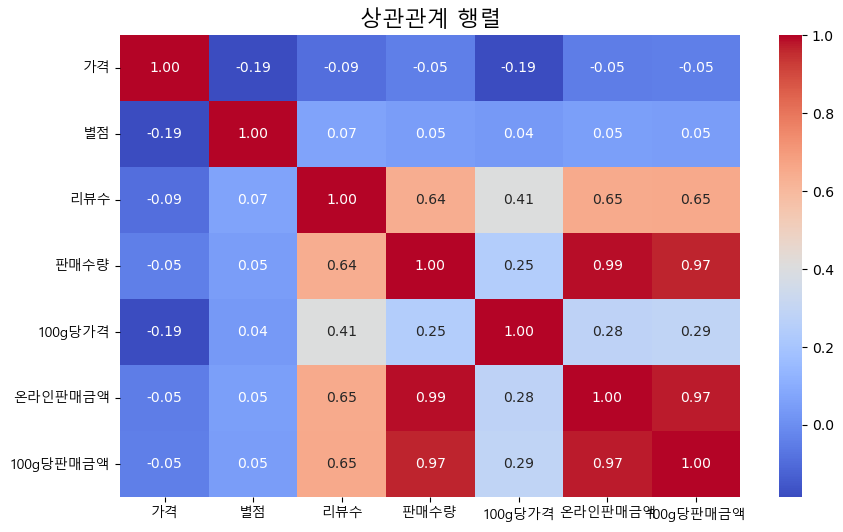

In [74]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트 경로
fontprop = fm.FontProperties(fname=font_path)

# 숫자형 열만 선택
numeric_df = df.select_dtypes(include=["int64", "float64"])

# 상관관계 분석
correlation_matrix = numeric_df.corr()
print(correlation_matrix["판매수량"].sort_values(ascending=False))

# 상관관계 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# 제목 및 폰트 설정
plt.title("상관관계 행렬", fontproperties=fontprop, fontsize=16)

# x축, y축 라벨 폰트 설정
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)

# 그래프 출력
plt.show()

#### 주성분 분석

In [103]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 결측값이 있는 행 제거
df_cleaned = df.dropna()

# 숫자형 열만 선택
numeric_df = df_cleaned.select_dtypes(include=["int64", "float64"])

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# PCA 수행
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 주성분과 판매수량 간의 상관관계 분석
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
df_pca["판매수량"] = df_cleaned["판매수량"].values

# 상관관계 확인
pca_correlation = df_pca.corr()["판매수량"].sort_values(ascending=False)
print(pca_correlation)

판매수량    1.000000
PC1     0.960980
PC2     0.181596
PC3     0.027777
PC4    -0.060173
PC7    -0.070739
PC6    -0.087465
PC5    -0.162767
Name: 판매수량, dtype: float64


In [104]:
# PCA 모델의 components_ 속성 확인
pca_components = pca.components_

# 첫 번째 주성분(PC1)의 가중치
pc1_weights = pca_components[0]

# 원본 컬럼명과 함께 출력
for col, weight in zip(numeric_df.columns, pc1_weights):
    print(f"{col}: {weight:.4f}")

가격: -0.1107
별점: 0.0508
리뷰수: 0.4078
판매수량: 0.5108
100g당가격: 0.1734
온라인판매금액: 0.5136
100g당판매금액: 0.5139


-> 변수가 거의없고 가중치를 높게 둔것들이 하필이면 판매수량가지고 만든 변수들이기 때문에 0.96으로 높을 수 밖에 없는 것. 

지금데이터로는 PCA하기가 힘들어서 상품명을 기준으로 요리복잡도, 투여재료 개수 등등 더 추가 데이터를 결합해서 봐야 주성분분석을 수행할 수 있을 것 같다.
상관 관계 쪽도 마찬가지

### 이상치 제거 후 상관관계 보기
일단 판매한 이력이 있는 걸로만 보기

In [85]:
# 이상치 제거: 판매수량 > 0 
filtered_df = df[(df["판매수량"] > 0) ]

In [88]:
top_price = filtered_df.sort_values(by="100g당가격", ascending=False).head(5)
top_price

,상품명,가격,별점,리뷰수,판매수량,100g당가격,온라인판매금액,100g당판매금액
116,호밍스 언양식 바싹불고기 270G,10900,4.7,167,46,4037,501400,185702
15,라그릴리아 시그니처 바비큐폭립 600G,23900,4.6,182,2037,3983,48684300,8113371
2,하코야 통 고구마 치즈 돈까스 280G,10900,4.8,1570,12257,3893,133601300,47716501
178,[밀키트] 블루베리 부채살 로얄 정통스테이크 냉동 320G,11900,4.5,15,15,3719,178500,55785
19,하코야 롱 오징어까스 320G,10900,4.6,2325,1637,3406,17843300,5575622


In [89]:
low_price = filtered_df.sort_values(by="100g당가격", ascending=False).tail(5)
low_price

,상품명,가격,별점,리뷰수,판매수량,100g당가격,온라인판매금액,100g당판매금액
152,하남돼지집 돼지 김치찌개 500g x 3개,22800,5.0,2,23,0,524400,0
153,[경복궁]직화 석쇠 불고기 150gx3팩,27900,4.3,4,23,0,641700,0
154,[경복궁]사골 고기 도가니탕 600gx4팩,51700,4.5,2,23,0,1189100,0
156,하남돼지집 차돌 된장술밥 250g x 3개,18000,5.0,2,22,0,396000,0
157,[경복궁]꼬리곰탕 600gx3팩,33600,5.0,1,22,0,739200,0


In [90]:
filtered_df2 = df[(df["100g당가격"] > 0) ]

In [92]:
filtered_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 0 to 1115
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상품명        139 non-null    object 
 1   가격         139 non-null    int64  
 2   별점         139 non-null    float64
 3   리뷰수        139 non-null    int64  
 4   판매수량       139 non-null    int64  
 5   100g당가격    139 non-null    int64  
 6   온라인판매금액    139 non-null    int64  
 7   100g당판매금액  139 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 9.8+ KB


In [93]:
filtered_df2.tail()

,상품명,가격,별점,리뷰수,판매수량,100g당가격,온라인판매금액,100g당판매금액
291,[밀키트] 불화짬뽕 찌개 476G,10900,4.1,11,0,2290,0,0
445,[밀키트] 팔당원조칼제비 얼큰한맛 냉동 491G,9990,5.0,3,0,2035,0,0
1113,[밀키트] 홈밀 채선당 소고기 샤브샤브 845G,9990,4.8,944,6912,1182,69050880,8169984
1114,[밀키트] 홈밀 알탕 873G,9990,4.7,302,1848,1144,18461520,2114112
1115,홈밀 북엇국 500G,4990,4.8,116,251,998,1252490,250498


In [79]:
# 가격과 온라인판매금액 간의 상관계수 계산
correlation = filtered_df["100g당가격"].corr(filtered_df["판매수량"])
print(f"가격과 판매수량 간의 상관계수: {correlation}")

가격과 판매수량 간의 상관계수: 0.16723804471136736


In [94]:
# 가격과 온라인판매금액 간의 상관계수 계산
correlation = filtered_df2["100g당가격"].corr(filtered_df2["판매수량"])
print(f"가격과 판매수량 간의 상관계수: {correlation}")

가격과 판매수량 간의 상관계수: 0.10024972778988986


filtered_df = df[(df["판매수량"] > 0) ] 

filtered_df2 = df[(df["100g당가격"] > 0) ]

filtered_df와 2 둘다 이상치 제거해본 결과 상관계수가 작다. -> 별로 상관이 있지 않다. 

#### (시각화)상관관계 매트릭스 히트맵 - 이상치 제거

판매수량         1.000000
온라인판매금액      0.986871
100g당판매금액    0.965289
리뷰수          0.626250
100g당가격      0.167238
별점           0.066515
가격          -0.083726
Name: 판매수량, dtype: float64


C:\Users\eunju\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\eunju\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\eunju\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\eunju\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\eunju\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\eunju\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  f

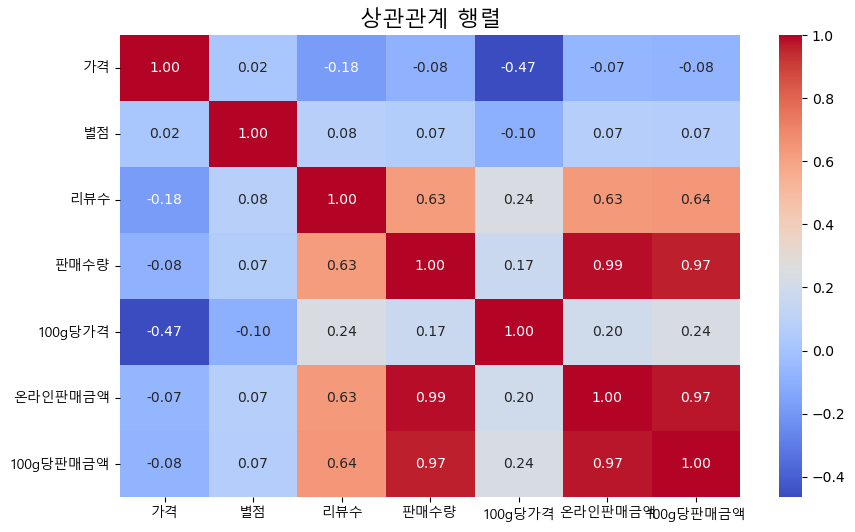

In [80]:
# 숫자형 열만 선택
numeric_df = filtered_df.select_dtypes(include=["int64", "float64"])

# 상관관계 분석
correlation_matrix = numeric_df.corr()
print(correlation_matrix["판매수량"].sort_values(ascending=False))

# 상관관계 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# 제목 및 폰트 설정
plt.title("상관관계 행렬", fontproperties=fontprop, fontsize=16)

# x축, y축 라벨 폰트 설정
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)

# 그래프 출력
plt.show()

 -> 이상치를 제거했음에도 거의 상관이 없는 것을 확인할 수 있다. 따라서 싸다고 무조건 잘팔리지는 않는다. 
 
 리뷰수같은 경우는 많이 팔릴 수록 리뷰도 많이 달리기 때문에 0.64로 상관계수가 높게 나오는 것.

#### (시각화) 가격과 판매수량 산점도

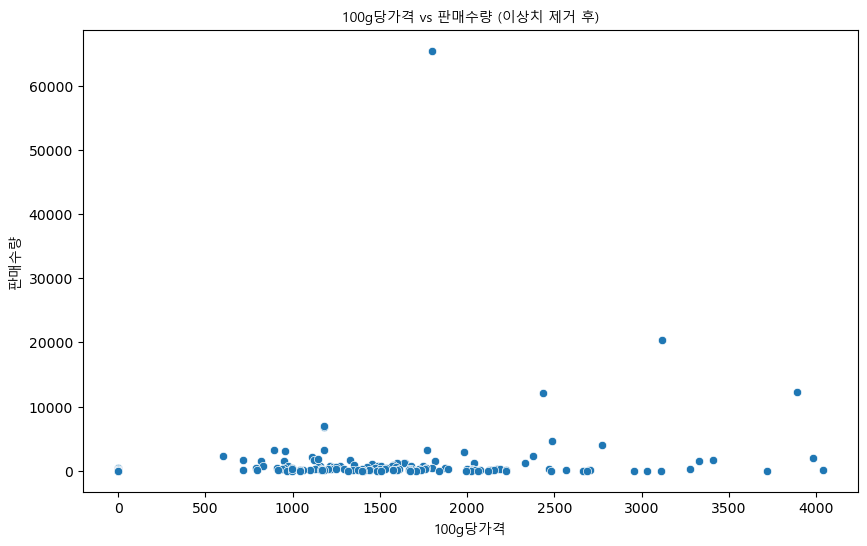

In [82]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
font_path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 가격과 온라인판매금액 간의 산점도 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='100g당가격', y='판매수량', data=filtered_df)
plt.title('100g당가격 vs 판매수량 (이상치 제거 후)', fontproperties=fontprop)
plt.xlabel('100g당가격', fontproperties=fontprop)
plt.ylabel('판매수량', fontproperties=fontprop)
plt.show()

#### (시각화) 히스토그램+ 커널밀도함수 - 이상치 제거 버전
100g당 가격이 없는건 제외 했다.

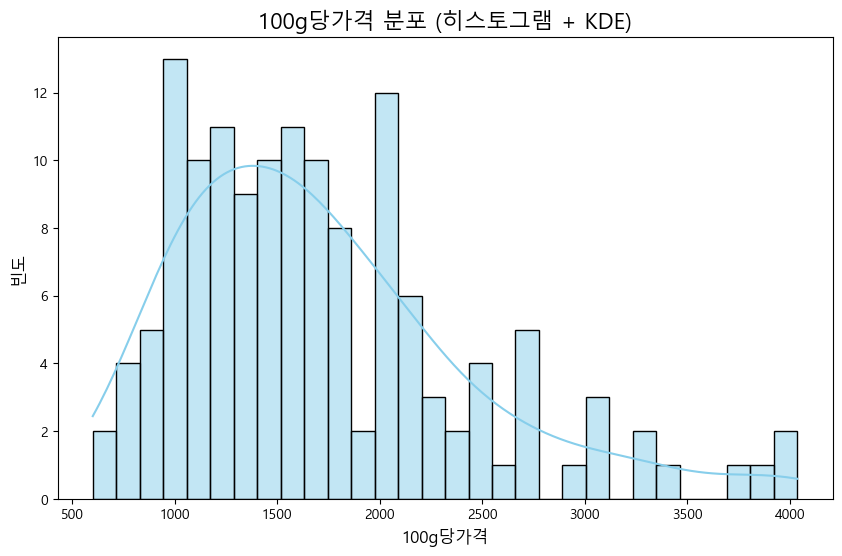

In [95]:
# 전역 폰트 설정
plt.rcParams["font.family"] = fontprop.get_name()

# 히스토그램 + KDE 그리기
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df2["100g당가격"], kde=True, bins=30, color="skyblue")

# 제목 및 라벨 설정
plt.title("100g당가격 분포 (히스토그램 + KDE)", fontsize=16)
plt.xlabel("100g당가격", fontsize=12)
plt.ylabel("빈도", fontsize=12)

# 그래프 출력
plt.show()

-> 주로 가격대 형성이 100g당 1000~2000원대 인것을 볼 수 있다.

### 자주 등장하는 상품명 확인 
판매이력이 있는 데이터에서, 인기상품 100위 까지 가장 자주 등장하는 상품명은 뭘까 ? 

In [29]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 1124
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   상품명      196 non-null    object 
 1   가격       196 non-null    int64  
 2   별점       169 non-null    float64
 3   리뷰수      196 non-null    int64  
 4   판매수량     196 non-null    int64  
 5   온라인판매금액  196 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 10.7+ KB


In [96]:
df2= filtered_df.sort_values(by="판매수량", ascending=False).head(100)

#### 상품명 리스트화

In [97]:
product_names = df2["상품명"].tolist()
print(product_names)

['애슐리 오리지널 통살치킨 500G', '하코야 통 치즈 돈까스 350G', '하코야 통 고구마 치즈 돈까스 280G', '투다리 김치오뎅전골 653G', '[밀키트] 홈밀 채선당 소고기 샤브샤브 845G', '[밀키트] 홈밀 채선당 소고기 샤브샤브 845G', '하코야 김치카츠 나베 680G', '하코야 멘치까스 360G', '[밀키트] 밀푀유 나베 4인분 1129G', '[밀키트] 홈밀 푸짐한 스팸 부대찌개 1120G', '[밀키트] 얼큰 미나리 버섯샤브전골 835G', '[밀키트] 홈밀 놀부 부대찌개 1042G', '하코야 오뎅전골 751G', '[밀키트] 홈밀 이건 꼭 사야해 부대찌개 2.5KG', '[밀키트] 홈밀 감바스 알 아히요 420G', '[밀키트] 홈밀 푸짐한 밀푀유나베 1079G', '라그릴리아 시그니처 바비큐폭립 600G', '[밀키트] 홈밀 알탕 873G', '[밀키트] 려강 국내산 사골육수 모둠 순대국 1.4KG', '[밀키트] 홈밀 푸짐한 스팸 부대찌개 525G', '[밀키트] 홈밀 이춘삼 쟁반짜장 890G', '하코야 롱 오징어까스 320G', '달떡볶이 쫄깃 바삭 떡꼬치 330G', '[밀키트] 홈밀 감자수제비 순두부 찌개 1100G', '하코야 롱 생선까스 300G', '[밀키트] 홈밀 칼칼하고 시원한 부대찌개 735G', '[밀키트] 홈밀 쟌슨빌 부대찌개 425G', '추억의 1999 홍대떡볶이 냉동 426G', '[밀키트] 홈밀 소불고기 버섯전골 300G', '[밀키트] 홈밀 직화 소불고기 버섯전골 490G', '홈밀 튤립 국물닭발 400G', '[밀키트] 홈밀 우삼겹 된장찌개 480G (1인분)', '[밀키트] 우삼겹 낙곱새 전골 4인분 1585G', '[밀키트] 홈밀 돼지고기 김치찌개 738G', '[밀키트] 홈밀 동태탕 863G', '[밀키트] 홈밀 북창동식해물순두부찌개', '[밀키트] 홈밀 한우곱창전골 832G', '[밀키트] 홈밀 직화 우삼겹 된장찌개 670G', '[밀키트] 홈밀 대구매운탕 823G', '[밀키트

#### 불용어 제거

In [98]:
from collections import Counter
import re

# 제거할 불용어 담기
stopwords = ['밀키트', '홈밀', '요리재료', 'G', 'KG', 'x', '개', '인분', '직화', 'g']

# 정규화로 단어 정제하는 함수
def clean_and_tokenize(text):
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase and split into words
    words = text.lower().split()
    # Remove stopwords
    words = [word for word in words if word not in stopwords]
    return words

# 하나의 string으로 모두 합치기
all_text = ' '.join(product_names)

# 정규화정제로 상품명들 정제하기
words = clean_and_tokenize(all_text)

# 자주등장하는 단어 개수 세기
word_counts = Counter(words)

# 가장 자주 등장하는 것 20개
most_common = word_counts.most_common(20)

# 결과
for word, count in most_common:
    print(f"{word}: {count}")

하코야: 7
부대찌개: 7
애슐리: 4
채선당: 4
푸짐한: 4
우삼겹: 4
된장찌개: 4
전골: 4
오리지널: 3
소고기: 3
려강: 3
소불고기: 3
스테이크: 3
통: 2
치즈: 2
돈까스: 2
샤브샤브: 2
나베: 2
스팸: 2
놀부: 2


### 결과정리

-> 부대찌개, 하코야, 애슐리, 채선당, 된장찌개, 전골 등이 보인다.

### 디벨롭 방안

1. 분석 추가 아이디어 : 각 상품별 가격대 분포 확인하기 -> 상품을 기획할 때 가격대 형성에 참고
2. 레시피 데이터 결합해서 분석해보기 -> 레시피 데이터 결합할 때 상품분류를 어떻게 할 지 고민
   ex.바비큐 폭립은 바비큐이기도 하고 폭립에 속하기도 한다.